In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import TomekLinks
from sklearn.utils.class_weight import compute_class_weight 

In [16]:
data = pd.read_csv(r"healthcare-dataset-stroke-data.csv") 

In [17]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

print(data.info())
print(data['smoking_status'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


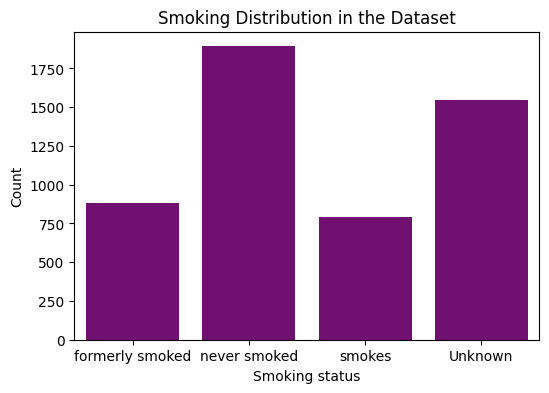

In [53]:
plt.figure(figsize=(6, 4))
sns.countplot(x='smoking_status', data=data, color='purple')
plt.title('Smoking Distribution in the Dataset')
plt.xlabel('Smoking status')
plt.ylabel('Count')
plt.show()

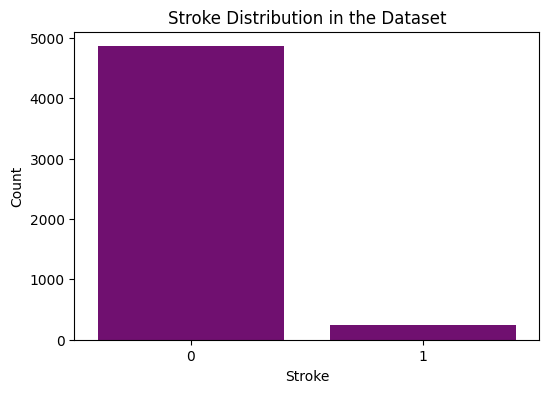

In [56]:
plt.figure(figsize=(6, 4))
sns.countplot(x='stroke', data=data, color='purple')
plt.title('Stroke Distribution in the Dataset')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

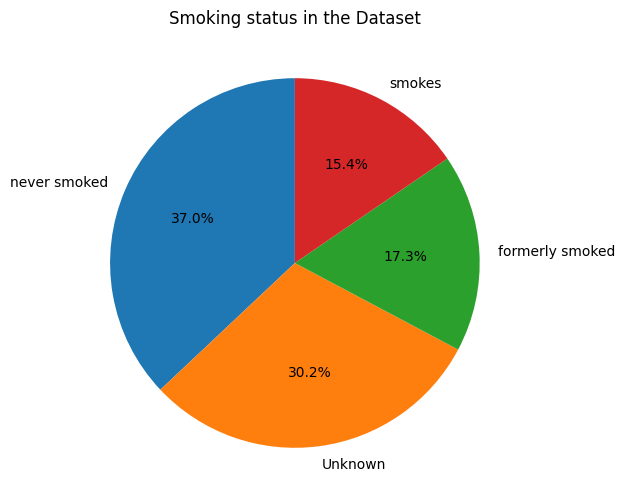

In [57]:
plt.figure(figsize=(6, 6))
class_counts = data['smoking_status'].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Smoking status in the Dataset')
plt.show()

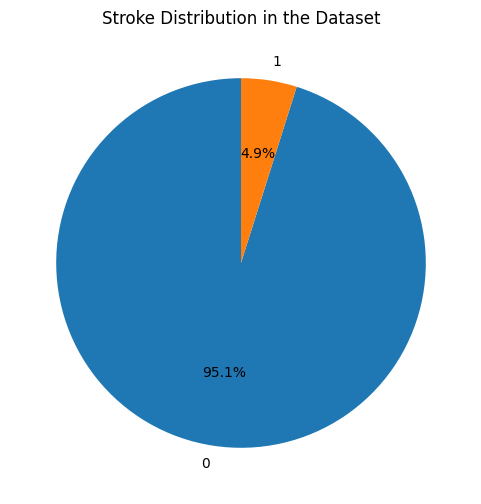

In [59]:
plt.figure(figsize=(6, 6))
class_counts = data['stroke'].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Stroke Distribution in the Dataset')
plt.show()

In [60]:
X = data.drop('stroke', axis=1)
y = data['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [69]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col]) 
    label_encoders[col] = le 

    le_classes = list(le.classes_)
    le_classes.append('Unknown')  
    le.classes_ = np.array(le_classes)

    
    X_test[col] = X_test[col].apply(lambda x: x if x in le.classes_ else 'Unknown')
    X_test[col] = le.transform(X_test[col]) 

print("Encoded X_train:")
print(X_train.head())
print("Encoded X_test:")
print(X_test.head())

X_train['bmi'] = X_train['bmi'].replace('N/A', None).astype(float)
X_train['bmi'].fillna(X_train['bmi'].mean(), inplace=True)

X_test['bmi'] = X_test['bmi'].replace('N/A', None).astype(float)
X_test['bmi'].fillna(X_test['bmi'].mean(), inplace=True)

Encoded X_train:
         id  gender   age  hypertension  heart_disease  ever_married  \
802    4970       1  79.0             0              0             1   
3927  56137       0  62.0             0              0             1   
2337  54590       0  21.0             0              0             0   
3910  36548       1  31.0             0              0             1   
1886  61171       0  31.0             0              0             0   

      work_type  Residence_type  avg_glucose_level   bmi  smoking_status  
802           3               0             112.64  28.5               1  
3927          2               1              88.32  36.3               0  
2337          2               0              59.52  33.7               2  
3910          0               1              65.70  30.4               1  
1886          2               0              59.63  19.9               2  
Encoded X_test:
         id  gender   age  hypertension  heart_disease  ever_married  \
4688  40041 

C:\Users\Kashish\AppData\Local\Temp\ipykernel_60268\4178775755.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['bmi'].fillna(X_train['bmi'].mean(), inplace=True)
C:\Users\Kashish\AppData\Local\Temp\ipykernel_60268\4178775755.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [70]:
def evaluate_model(X_train, y_train, X_test, y_test, class_weights=None):
    model = RandomForestClassifier(class_weight=class_weights, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    print(classification_report(y_test, y_pred))
    print("AUC:", roc_auc_score(y_test, y_prob)) 

In [71]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train) 
print("Random Undersampling:")
evaluate_model(X_rus, y_rus, X_test, y_test)

X_train shape: (4088, 11)
y_train shape: (4088,)
Random Undersampling:
              precision    recall  f1-score   support

           0       0.99      0.65      0.78       960
           1       0.14      0.87      0.24        62

    accuracy                           0.66      1022
   macro avg       0.56      0.76      0.51      1022
weighted avg       0.94      0.66      0.75      1022

AUC: 0.8012264784946236


In [81]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train) 
print("Random Oversampling:")
evaluate_model(X_ros, y_ros, X_test, y_test)

Random Oversampling:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

AUC: 0.7900537634408602


C:\Users\Kashish\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Kashish\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Kashish\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [80]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
print("SMOTE:")
evaluate_model(X_smote, y_smote, X_test, y_test)

SMOTE:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

AUC: 0.7922883064516129


C:\Users\Kashish\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Kashish\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Kashish\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [79]:
tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X_train, y_train) 
print("Tomek Links:")
evaluate_model(X_tl, y_tl, X_test, y_test)

Tomek Links:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

AUC: 0.8055863575268818


C:\Users\Kashish\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Kashish\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Kashish\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [78]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights)) 
print("Class Weights:")
evaluate_model(X_train, y_train, X_test, y_test, class_weights_dict) 

Class Weights:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

AUC: 0.8010248655913978


C:\Users\Kashish\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Kashish\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Kashish\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [76]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)

print("After ADASYN:")
print(y_adasyn.value_counts())

After ADASYN:
stroke
1    3955
0    3901
Name: count, dtype: int64


In [77]:
from imblearn.under_sampling import NearMiss

nearmiss = NearMiss(version=1)
X_nearmiss, y_nearmiss = nearmiss.fit_resample(X_train, y_train)

print("After NearMiss:")
print(y_nearmiss.value_counts())

After NearMiss:
stroke
0    187
1    187
Name: count, dtype: int64


In [83]:
from sklearn.metrics import precision_recall_curve

y_probs = model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
optimal_threshold = thresholds[np.argmax(recall - precision)]

print("Optimal threshold:", optimal_threshold)

Optimal threshold: 0.012066074765122963
